# Malaria Detection

A deep learning model classifying whether if a person is diagnosed with malaria.

**Datasets**: [Malaria datasets](https://www.tensorflow.org/datasets/catalog/malaria)

---

## Dependencies

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

from typing import Tuple

---

## Importing Dataset

Loading the malaria dataset in using `tensorflow_datasets`.
* This dataset has only **train**, it is required to manually split the data.

In [51]:
train_dataset, train_dataset_info = tfds.load('malaria', 
                                    with_info=True, 
                                    as_supervised=True, 
                                    shuffle_files=True, 
                                    split=['train'])

Checking the loaded train dataset.

In [49]:
train_dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [16]:
for train_data in train_dataset[0].take(1): # Taking 1 data snapshot
    print(train_data)

(<tf.Tensor: shape=(145, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


In [19]:
len(train_dataset[0])

27558

There are total of **27,558** training images.

### Splitting the dataset

In [54]:
dataset_info = train_dataset_info

In [44]:
def split_dataset(dataset:tf.data.Dataset, TRAIN_SPLIT:int, VAL_SPLIT:int, TEST_SPLIT:int) -> Tuple:
    dataset_len = len(dataset)

    train_dataset = dataset.take(int(TRAIN_SPLIT*dataset_len))

    # Skipping the part assigned for train dataset
    val_test_dataset = dataset.skip(int(TRAIN_SPLIT*dataset_len))

    val_dataset = val_test_dataset.take(int(VAL_SPLIT*dataset_len))

    test_dataset = val_test_dataset.skip(int(VAL_SPLIT*dataset_len))
    
    return train_dataset, val_dataset, test_dataset

In [52]:
train_dataset, val_dataset, test_dataset = split_dataset(train_dataset[0], 0.8, 0.1, 0.1)

print(len(list(train_dataset.as_numpy_iterator())), 
      len(list(val_dataset.as_numpy_iterator())), 
      len(list(test_dataset.as_numpy_iterator())))

22046 2755 2757


---

## Visualising Dataset

Viewing *dataset_info* to retrieve useful image attributes.

In [55]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='C:\\Users\\linta\\tensorflow_datasets\\malaria\\1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin 

Plotting 16 datasets for visualisation purposes.

Label [0] - parasitized
Label [1] - uninfected


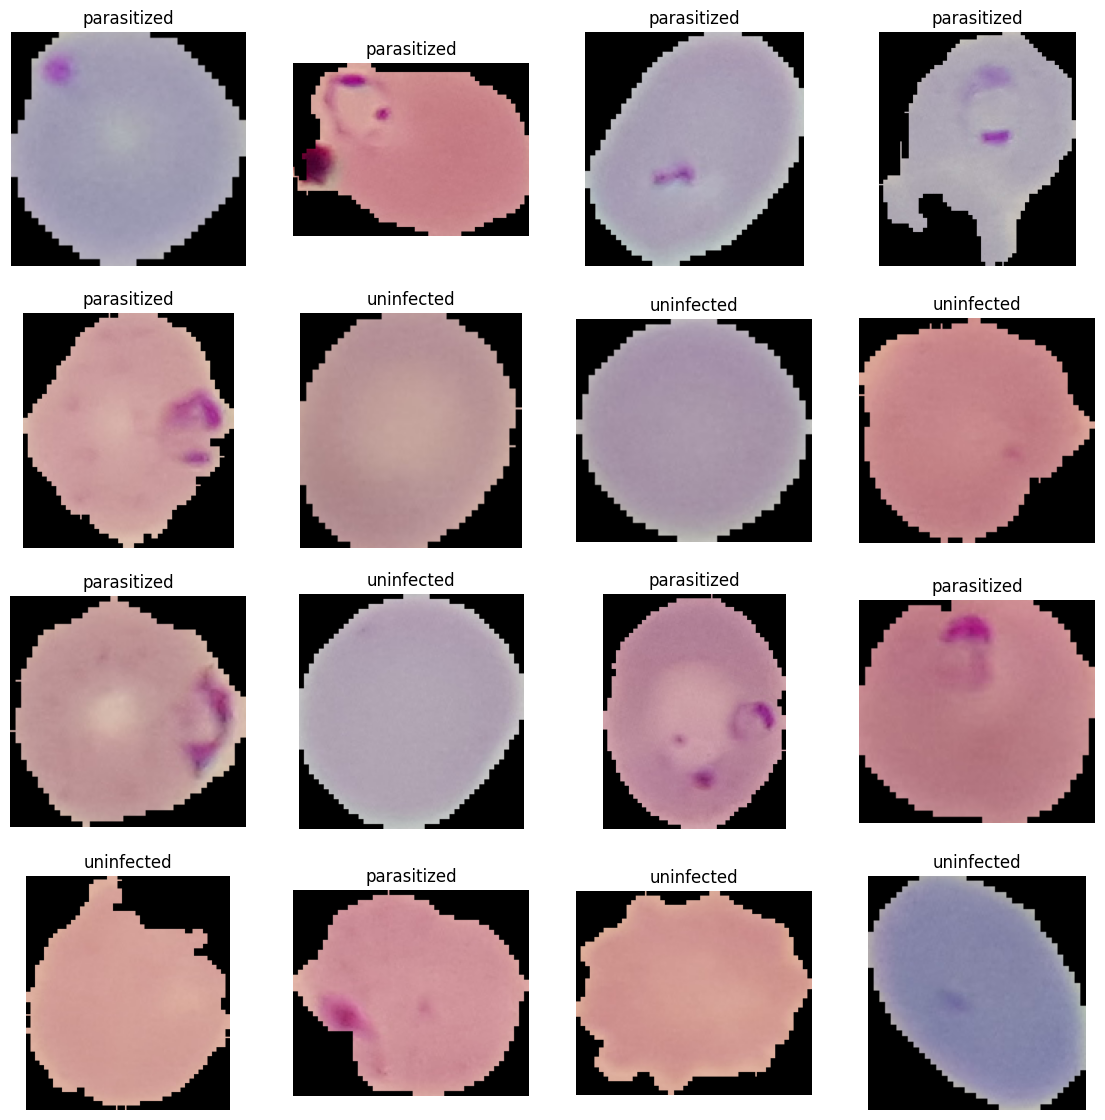

In [72]:
plt.figure(figsize=(14, 14))

for idx, (img, label) in enumerate(train_dataset.take(16)):
    plt.subplot(4, 4, idx+1)
    plt.imshow(img)
    plt.title(dataset_info.features['label'].int2str(label))
    plt.axis(False)
    
print(f"Label [0] - {dataset_info.features['label'].int2str(0)}")
print(f"Label [1] - {dataset_info.features['label'].int2str(1)}")